## Importing necessary dependencies

In [3]:
import pandas as pd
from obspy.clients.fdsn import Client
from obspy.geodetics import gps2dist_azimuth
from tqdm import tqdm
from obspy import read_events

## Reading PNSN catalog

In [4]:
# Path to your XML file
xml_file = "../utils/Cascades_corridor_Dec_1-17_PNSN_preferred_solutions.xml"

# Read QuakeML
catalog = read_events(xml_file)

rows = []

for event in catalog:
    origin = event.preferred_origin()
    magnitude = event.preferred_magnitude()


    row = {
        "event_id": event.resource_id.id,
        "event_type": event.event_type,
        "time_utc": origin.time.datetime if origin else None,
        "latitude": origin.latitude if origin else None,
        "longitude": origin.longitude if origin else None,
        "depth_km": origin.depth / 1000 if origin and origin.depth else None,
        "magnitude": magnitude.mag if magnitude else None,
        "magnitude_type": magnitude.magnitude_type if magnitude else None,
        "evaluation_mode": origin.evaluation_mode if origin else None,
        "evaluation_status": origin.evaluation_status if origin else None,
        "used_phase_count": (
            origin.quality.used_phase_count
            if origin and origin.quality
            else None
        ),
        "associated_phase_count": (
            origin.quality.associated_phase_count
            if origin and origin.quality
            else None
        ),
    }

    rows.append(row)

df = pd.DataFrame(rows)


In [5]:
df

,event_id,event_type,time_utc,latitude,longitude,depth_km,magnitude,magnitude_type,evaluation_mode,evaluation_status,used_phase_count,associated_phase_count
0,quakeml:uw.anss.org/Event/UW/62216081,earthquake,2025-12-01 07:51:35.540,46.848333,-121.903000,7.540000,0.04,Ml,manual,final,28,30
1,quakeml:uw.anss.org/Event/UW/62216076,other event,2025-12-01 07:35:31.620,46.835600,-121.733000,-3.076000,-5.00,Mh,manual,final,0,0
2,quakeml:uw.anss.org/Event/UW/62216101,earthquake,2025-12-01 13:59:44.030,46.847833,-121.762667,0.620000,0.18,Ml,manual,final,13,13
3,quakeml:uw.anss.org/Event/UW/62216291,earthquake,2025-12-02 19:54:12.800,47.503333,-121.951667,68.820000,1.27,Ml,manual,final,26,28
4,quakeml:uw.anss.org/Event/UW/62216371,earthquake,2025-12-03 02:48:12.470,48.151333,-121.645500,11.280000,0.95,Md,manual,final,13,13
5,quakeml:uw.anss.org/Event/UW/62216246,earthquake,2025-12-02 12:03:58.430,47.677167,-121.777500,19.690000,1.03,Ml,manual,final,31,34
6,quakeml:uw.anss.org/Event/UW/62216656,earthquake,2025-12-04 15:42:33.230,46.942167,-121.960000,11.190000,0.41,Ml,manual,final,23,23
7,quakeml:uw.anss.org/Event/UW/62216631,other event,2025-12-04 12:33:18.590,46.835600,-121.733000,-3.076000,0.00,Mh,manual,final,0,0
8,quakeml:uw.anss.org/Event/UW/62216606,earthquake,2025-12-04 04:43:06.850,46.846667,-121.922833,10.820000,0.21,Ml,manual,final,36,36
9,quakeml:uw.anss.org/Event/UW/62216381,earthquake,2025-12-03 08:01:24.010,46.940000,-121.959000,10.970000,0.33,Ml,manual,final,36,39


## Finding nearest 10 stations for each event

In [6]:
# Keep only earthquakes
eq_df = df.copy()
# ---------------------------------------------------------------------
# 2. Connect to FDSN
# ---------------------------------------------------------------------
client = Client("IRIS")  # or "EARTHSCOPE"

# ---------------------------------------------------------------------
# 3. Function to find nearest stations
# ---------------------------------------------------------------------
def find_nearest_stations(
    event_lat,
    event_lon,
    max_radius_km=300,
    n_stations=10,
):
    """
    Returns a DataFrame with the nearest seismic stations.
    """

    inv = client.get_stations(
        latitude=event_lat,
        longitude=event_lon,
        maxradius=max_radius_km / 111.0,  # km → degrees
        level="station",
    )

    rows = []

    for network in inv:
        for station in network:
            dist_m, az, baz = gps2dist_azimuth(
                event_lat,
                event_lon,
                station.latitude,
                station.longitude,
            )

            rows.append({
                "network": network.code,
                "station": station.code,
                "station_lat": station.latitude,
                "station_lon": station.longitude,
                "distance_km": dist_m / 1000.0,
                "azimuth": az,
                "back_azimuth": baz,
            })

    station_df = pd.DataFrame(rows)

    return station_df.sort_values("distance_km").head(n_stations)

# ---------------------------------------------------------------------
# 4. Apply to each earthquake
# ---------------------------------------------------------------------
all_results = []

for _, row in tqdm(eq_df.iterrows()):
    nearest = find_nearest_stations(
        row.latitude,
        row.longitude,
        max_radius_km=300,
        n_stations=10,
    )

    nearest["event_id"] = row.event_id
    nearest["event_lat"] = row.latitude
    nearest["event_lon"] = row.longitude

    all_results.append(nearest)

nearest_stations_df = pd.concat(all_results, ignore_index=True)

# ---------------------------------------------------------------------
# 5. Result
# ---------------------------------------------------------------------
print(nearest_stations_df)


32it [08:58, 16.81s/it]

    network station  station_lat  station_lon  distance_km     azimuth  \
0        SY    PR05    46.841724  -121.948860     3.574333  258.154359   
1        CC    PR05    46.841723  -121.948863     3.574580  258.153370   
2        SY    SIFT    46.866871  -121.953201     4.347660  298.312660   
3        CC    SIFT    46.866830  -121.953290     4.351483  298.217481   
4        UW     RER    46.818580  -121.842500     5.678436  125.603481   
..      ...     ...          ...          ...          ...         ...   
315      UW     WRW    47.856650  -120.883000     7.414532  173.451378   
316      4P   WAC06    47.881080  -120.666119    17.682637  105.161335   
317      UW     PLN    47.784512  -120.634209    24.811565  128.230924   
318      UW     GPW    48.117700  -121.138020    28.278690  320.081690   
319      UW     SLF    47.760580  -120.529460    32.734250  123.324045   

     back_azimuth                               event_id  event_lat  event_lon  
0       78.120904  quakeml:uw.

In [7]:
nearest_stations_df

,network,station,station_lat,station_lon,distance_km,azimuth,back_azimuth,event_id,event_lat,event_lon
0,SY,PR05,46.841724,-121.948860,3.574333,258.154359,78.120904,quakeml:uw.anss.org/Event/UW/62216081,46.848333,-121.9030
1,CC,PR05,46.841723,-121.948863,3.574580,258.153370,78.119913,quakeml:uw.anss.org/Event/UW/62216081,46.848333,-121.9030
2,SY,SIFT,46.866871,-121.953201,4.347660,298.312660,118.276030,quakeml:uw.anss.org/Event/UW/62216081,46.848333,-121.9030
3,CC,SIFT,46.866830,-121.953290,4.351483,298.217481,118.180787,quakeml:uw.anss.org/Event/UW/62216081,46.848333,-121.9030
4,UW,RER,46.818580,-121.842500,5.678436,125.603481,305.647607,quakeml:uw.anss.org/Event/UW/62216081,46.848333,-121.9030
...,...,...,...,...,...,...,...,...,...,...
315,UW,WRW,47.856650,-120.883000,7.414532,173.451378,353.459761,quakeml:uw.anss.org/Event/UW/62210147,47.922900,-120.8943
316,4P,WAC06,47.881080,-120.666119,17.682637,105.161335,285.330646,quakeml:uw.anss.org/Event/UW/62210147,47.922900,-120.8943
317,UW,PLN,47.784512,-120.634209,24.811565,128.230924,308.423765,quakeml:uw.anss.org/Event/UW/62210147,47.922900,-120.8943
318,UW,GPW,48.117700,-121.138020,28.278690,320.081690,139.900513,quakeml:uw.anss.org/Event/UW/62210147,47.922900,-120.8943


## Association

Combining the detections at all station and seeing in how many the origin time overlaps the detections

In [8]:
catalog_df = df.copy()
catalog_df["time_utc"] = pd.to_datetime(catalog_df["time_utc"], utc=True)


In [9]:
stations_df = nearest_stations_df.copy()


In [11]:
import glob

det_files = glob.glob("../logs/*_20251201_0000_to_20251217_1420_events.csv")

det_dfs = []

for f in det_files:
    df = pd.read_csv(f)
    df["start_time"] = pd.to_datetime(df["start_time"], utc=True)
    df["end_time"]   = pd.to_datetime(df["end_time"], utc=True)
    det_dfs.append(df)

detections_df = pd.concat(det_dfs, ignore_index=True)


In [12]:
results = []

for _, event in catalog_df.iterrows():

    event_id   = event.event_id
    event_time = event.time_utc
    event_type = event.event_type   # ← added

    # 10 nearest stations for this event
    event_stations = stations_df[
        stations_df["event_id"] == event_id
    ][["station", "network"]].drop_duplicates()

    detected_stations = set()

    for _, st in event_stations.iterrows():
        sta = st.station
        net = st.network

        matches = detections_df[
            (detections_df["station"] == sta) &
            (detections_df["network"] == net) &
            (detections_df["start_time"] <= event_time) &
            (detections_df["end_time"] >= event_time)
        ]

        if not matches.empty:
            detected_stations.add(f"{net}.{sta}")

    results.append({
        "event_id": event_id,
        "event_type": event_type,   # ← added
        "event_time": event_time,
        "n_stations_detected": len(detected_stations),
        "detected_stations": list(detected_stations),
    })


In [26]:
results = []

for _, event in catalog_df.iterrows():

    event_id   = event.event_id
    event_time = event.time_utc
    event_type = event.event_type

    # 10 nearest stations for this event
    event_stations = stations_df[
        stations_df["event_id"] == event_id
    ][["station", "network"]].drop_duplicates()

    detected_stations = set()
    detected_labels   = list()   # ← NEW

    for _, st in event_stations.iterrows():
        sta = st.station
        net = st.network

        matches = detections_df[
            (detections_df["station"] == sta) &
            (detections_df["network"] == net) &
            (detections_df["start_time"] <= event_time) &
            (detections_df["end_time"] >= event_time)
        ]

        if not matches.empty:
            detected_stations.add(f"{net}.{sta}")
            detected_labels.append(matches["class"].values[0])  # ← NEW

    results.append({
        "event_id": event_id,
        "event_type": event_type,
        "event_time": event_time,
        "n_stations_detected": len(detected_stations),
        "detected_stations": list(detected_stations),
        "model_labels": list(detected_labels),   # ← NEW
    })


In [27]:
results

[{'event_id': 'quakeml:uw.anss.org/Event/UW/62216081',
  'event_type': 'earthquake',
  'event_time': Timestamp('2025-12-01 07:51:35.540000+0000', tz='UTC'),
  'n_stations_detected': 5,
  'detected_stations': ['CC.PR05', 'CC.SIFT', 'CC.TAVI', 'UW.RER', 'CC.GNOB'],
  'model_labels': ['eq', 'eq', 'eq', 'eq', 'eq']},
 {'event_id': 'quakeml:uw.anss.org/Event/UW/62216076',
  'event_type': 'other event',
  'event_time': Timestamp('2025-12-01 07:35:31.620000+0000', tz='UTC'),
  'n_stations_detected': 2,
  'detected_stations': ['UW.RCS', 'UW.RCM'],
  'model_labels': ['su', 'su']},
 {'event_id': 'quakeml:uw.anss.org/Event/UW/62216101',
  'event_type': 'earthquake',
  'event_time': Timestamp('2025-12-01 13:59:44.030000+0000', tz='UTC'),
  'n_stations_detected': 3,
  'detected_stations': ['UW.RCS', 'UW.STAR', 'UW.RCM'],
  'model_labels': ['eq', 'eq', 'eq']},
 {'event_id': 'quakeml:uw.anss.org/Event/UW/62216291',
  'event_type': 'earthquake',
  'event_time': Timestamp('2025-12-02 19:54:12.800000+00

In [28]:
summary_df = pd.DataFrame(results)

summary_df.groupby("event_type")["n_stations_detected"].describe()


,count,mean,std,min,25%,50%,75%,max
event_type,,,,,,,,
earthquake,24.0,2.041667,1.488482,0.0,1.0,2.0,2.25,5.0
explosion,1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
other event,7.0,1.714286,0.755929,0.0,2.0,2.0,2.00,2.0


In [29]:
summary_df.iloc[1:30]

,event_id,event_type,event_time,n_stations_detected,detected_stations,model_labels
1,quakeml:uw.anss.org/Event/UW/62216076,other event,2025-12-01 07:35:31.620000+00:00,2,"[UW.RCS, UW.RCM]","[su, su]"
2,quakeml:uw.anss.org/Event/UW/62216101,earthquake,2025-12-01 13:59:44.030000+00:00,3,"[UW.RCS, UW.STAR, UW.RCM]","[eq, eq, eq]"
3,quakeml:uw.anss.org/Event/UW/62216291,earthquake,2025-12-02 19:54:12.800000+00:00,0,[],[]
4,quakeml:uw.anss.org/Event/UW/62216371,earthquake,2025-12-03 02:48:12.470000+00:00,2,"[UW.DART, UW.JCW]","[eq, eq]"
5,quakeml:uw.anss.org/Event/UW/62216246,earthquake,2025-12-02 12:03:58.430000+00:00,1,[UW.TOLT],[eq]
6,quakeml:uw.anss.org/Event/UW/62216656,earthquake,2025-12-04 15:42:33.230000+00:00,5,"[CC.CRBN, CC.RUSH, CC.VOIT, CC.CARB, CC.PR04]","[eq, eq, eq, eq, eq]"
7,quakeml:uw.anss.org/Event/UW/62216631,other event,2025-12-04 12:33:18.590000+00:00,2,"[UW.RCS, UW.RCM]","[px, su]"
8,quakeml:uw.anss.org/Event/UW/62216606,earthquake,2025-12-04 04:43:06.850000+00:00,4,"[CC.GNOB, CC.PR05, CC.SIFT, CC.TAVI]","[px, px, px, px]"
9,quakeml:uw.anss.org/Event/UW/62216381,earthquake,2025-12-03 08:01:24.010000+00:00,5,"[CC.CRBN, CC.RUSH, CC.VOIT, CC.CARB, CC.PR04]","[eq, eq, eq, eq, eq]"
10,quakeml:uw.anss.org/Event/UW/62216756,earthquake,2025-12-05 07:32:43.420000+00:00,2,"[UW.RCS, UW.RCM]","[su, eq]"


In [30]:
summary_df.iloc[1:30].to_csv('../logs/summary_detections_1_17_december.csv')

In [31]:
summary_df = summary_df.merge(
    catalog_df[
        ["event_id", "latitude", "longitude", "depth_km", "magnitude"]
    ],
    on="event_id",
    how="left",
)

summary_df

,event_id,event_type,event_time,n_stations_detected,detected_stations,model_labels,latitude,longitude,depth_km,magnitude
0,quakeml:uw.anss.org/Event/UW/62216081,earthquake,2025-12-01 07:51:35.540000+00:00,5,"[CC.PR05, CC.SIFT, CC.TAVI, UW.RER, CC.GNOB]","[eq, eq, eq, eq, eq]",46.848333,-121.903000,7.540000,0.04
1,quakeml:uw.anss.org/Event/UW/62216076,other event,2025-12-01 07:35:31.620000+00:00,2,"[UW.RCS, UW.RCM]","[su, su]",46.835600,-121.733000,-3.076000,-5.00
2,quakeml:uw.anss.org/Event/UW/62216101,earthquake,2025-12-01 13:59:44.030000+00:00,3,"[UW.RCS, UW.STAR, UW.RCM]","[eq, eq, eq]",46.847833,-121.762667,0.620000,0.18
3,quakeml:uw.anss.org/Event/UW/62216291,earthquake,2025-12-02 19:54:12.800000+00:00,0,[],[],47.503333,-121.951667,68.820000,1.27
4,quakeml:uw.anss.org/Event/UW/62216371,earthquake,2025-12-03 02:48:12.470000+00:00,2,"[UW.DART, UW.JCW]","[eq, eq]",48.151333,-121.645500,11.280000,0.95
5,quakeml:uw.anss.org/Event/UW/62216246,earthquake,2025-12-02 12:03:58.430000+00:00,1,[UW.TOLT],[eq],47.677167,-121.777500,19.690000,1.03
6,quakeml:uw.anss.org/Event/UW/62216656,earthquake,2025-12-04 15:42:33.230000+00:00,5,"[CC.CRBN, CC.RUSH, CC.VOIT, CC.CARB, CC.PR04]","[eq, eq, eq, eq, eq]",46.942167,-121.960000,11.190000,0.41
7,quakeml:uw.anss.org/Event/UW/62216631,other event,2025-12-04 12:33:18.590000+00:00,2,"[UW.RCS, UW.RCM]","[px, su]",46.835600,-121.733000,-3.076000,0.00
8,quakeml:uw.anss.org/Event/UW/62216606,earthquake,2025-12-04 04:43:06.850000+00:00,4,"[CC.GNOB, CC.PR05, CC.SIFT, CC.TAVI]","[px, px, px, px]",46.846667,-121.922833,10.820000,0.21
9,quakeml:uw.anss.org/Event/UW/62216381,earthquake,2025-12-03 08:01:24.010000+00:00,5,"[CC.CRBN, CC.RUSH, CC.VOIT, CC.CARB, CC.PR04]","[eq, eq, eq, eq, eq]",46.940000,-121.959000,10.970000,0.33


In [32]:
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client("IRIS")  # or "EARTHSCOPE"


In [33]:
def plot_undetected_event_waveforms(
    event_row,
    stations_df,
    results_df,
    n_stations=5,
    t_before=30,
    t_after=120,
    freqmin=1.0,
    freqmax= 20.0,
):
    """
    Plot waveforms for an undetected catalog event
    """

    event_id   = event_row.event_id
    event_time = UTCDateTime(event_row.event_time)
    event_type = event_row.event_type
    ev_lat     = event_row.latitude
    ev_lon     = event_row.longitude

    # Safety check
    res = results_df[results_df.event_id == event_id].iloc[0]
    if res["n_stations_detected"] != 0:
        print("Event was detected — skipping.")
        return

    # Nearest stations (sorted by distance)
    stas = (
        stations_df[stations_df.event_id == event_id]
        .sort_values("distance_km")
        .head(n_stations)
    )

    fig, ax = plt.subplots(figsize=(10, 2.2 * n_stations))

    for i, row in enumerate(stas.itertuples()):

        net, sta = row.network, row.station
        dist = row.distance_km

        try:
            st = client.get_waveforms(
                network=net,
                station=sta,
                location="*",
                channel="*Z",
                starttime=event_time - t_before,
                endtime=event_time + t_after,
                attach_response=False,
            )

            st.merge(fill_value="interpolate")
            tr = st[0]

            tr.detrend("demean")
            tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)

            t = tr.times(reftime=event_time)
            data = tr.data / max(abs(tr.data))  # normalize per trace

            ax.plot(
                t,
                data + i,
                color="black",
                linewidth=0.8,
            )

            ax.text(
                t[0] - 50,
                i,
                f"{net}.{sta}  ({dist:.1f} km)",
                va="center",
                fontsize=9,
            )

        except Exception as e:
            ax.text(
                 -70,
                i,
                f"{net}.{sta}  (no data)",
                color="red",
                va="center",
            )

    ax.axvline(0, color="red", linestyle="--", linewidth=1)

    ax.set_xlabel("Time since origin (s)")
    ax.set_ylabel("Epicentral distance (km)")

    ax.set_title(
        f"PNSN label: {event_type} | Origin time: {event_time.isoformat()}\n{event_id}",
        fontsize=11,
    )

    ax.invert_yaxis()
    ax.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


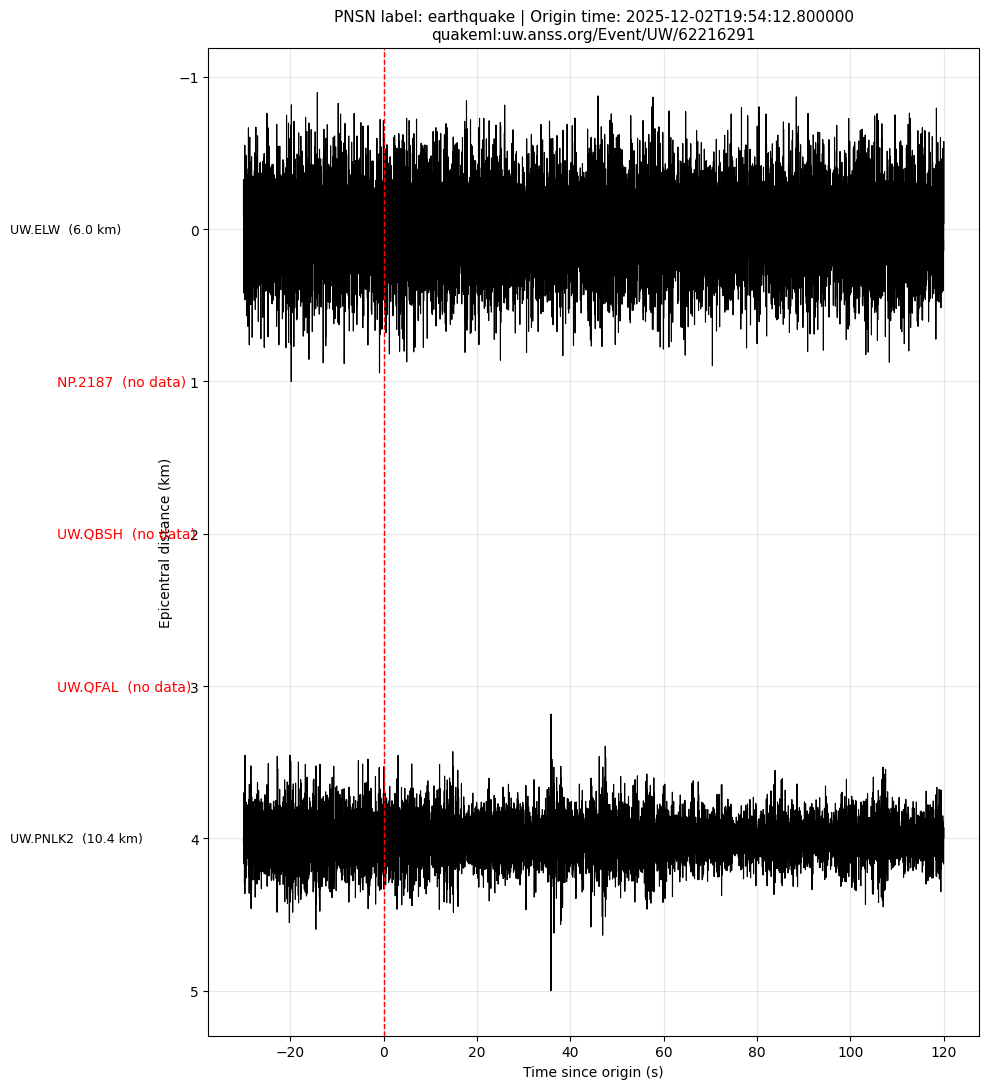

In [34]:
# events that were NOT detected
undetected_events = summary_df[
    summary_df.n_stations_detected == 0
]

# plot first one (or loop)
plot_undetected_event_waveforms(
    event_row=undetected_events.iloc[0],
    stations_df=stations_df,
    results_df=summary_df,
)


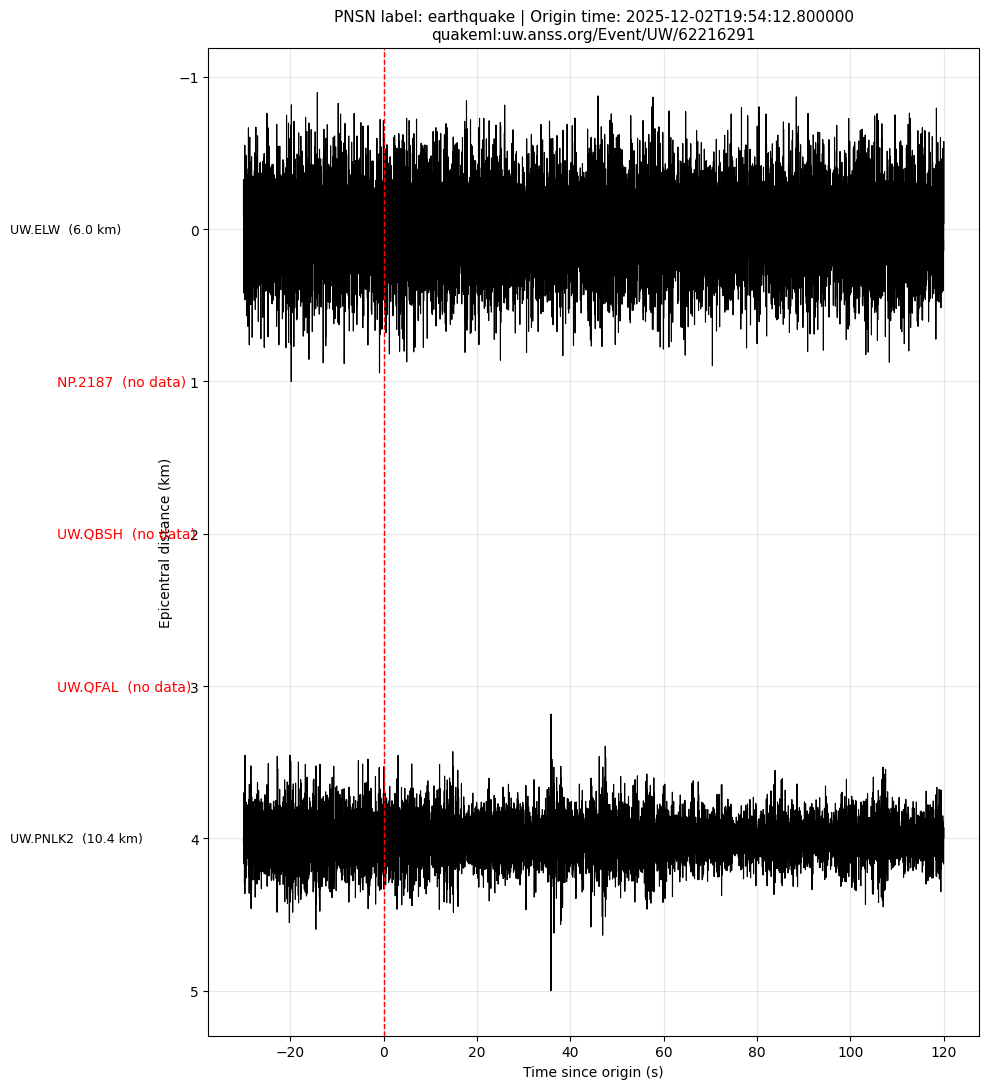

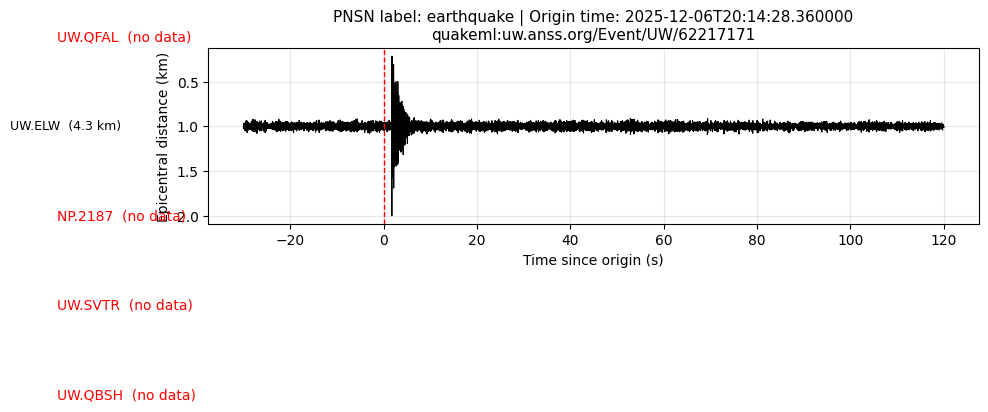

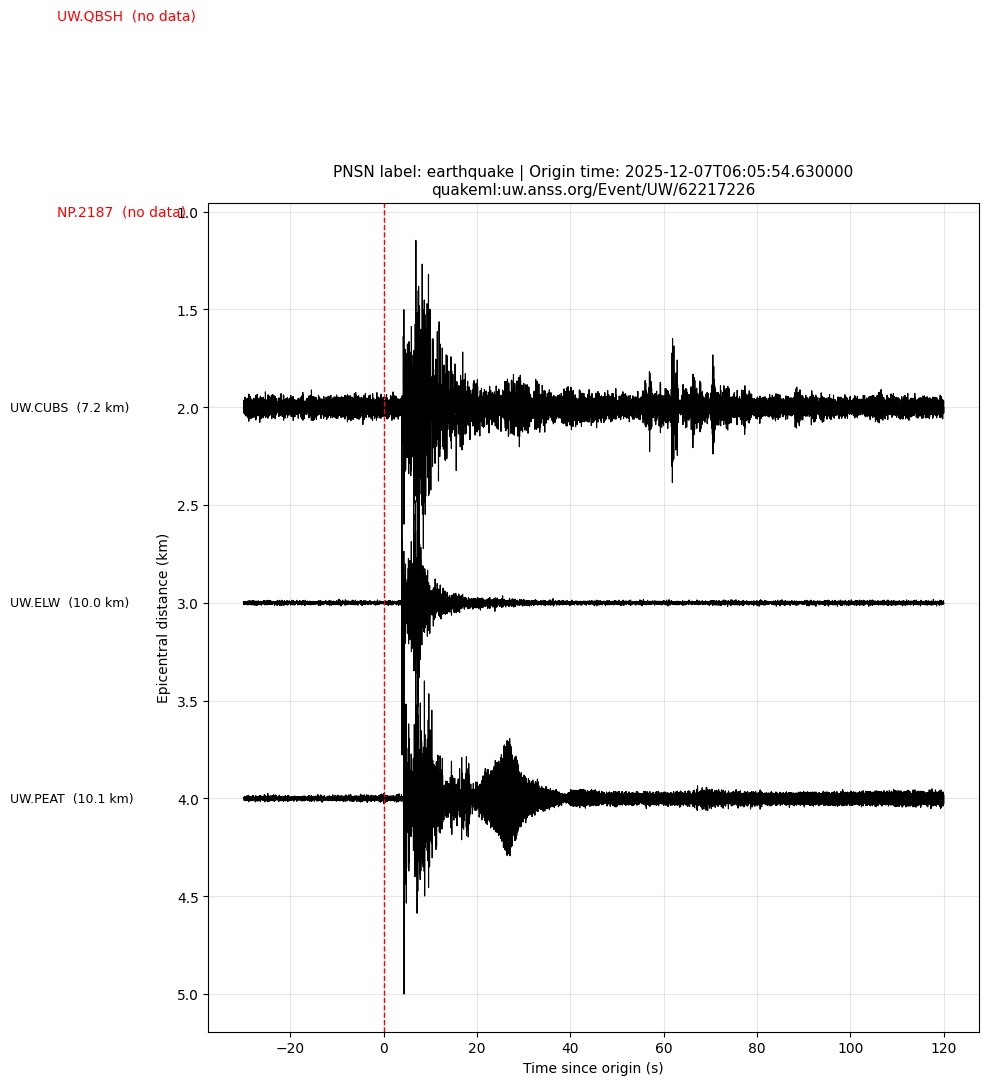

/tmp/ipykernel_2264719/623756058.py:98: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


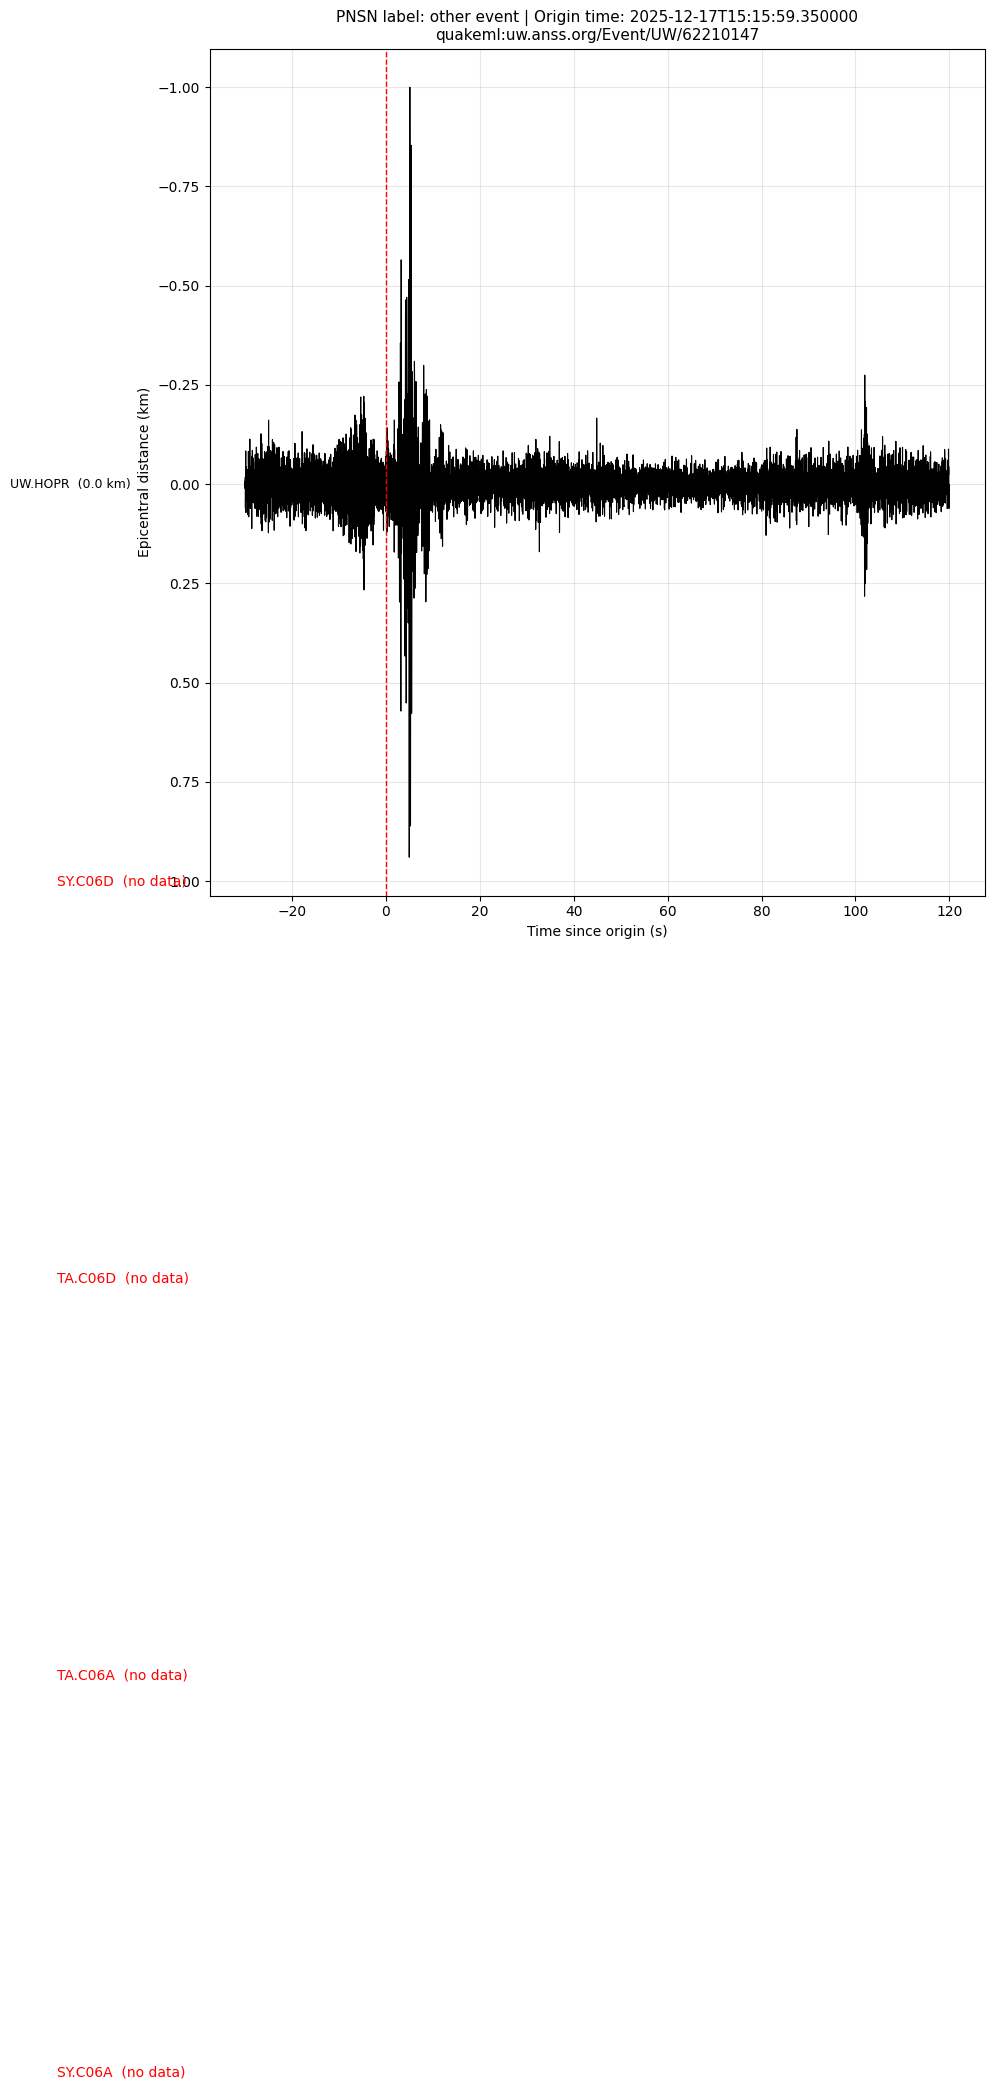

In [35]:
for _, ev in undetected_events.iterrows():
    plot_undetected_event_waveforms(
        ev,
        stations_df,
        summary_df,
    )


In [36]:
import json
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

# -----------------------------
# Input parameters
# -----------------------------
starttime = UTCDateTime(2025, 12, 1, 0, 0, 0)
endtime   = UTCDateTime(2025, 12, 17, 14, 20, 0)

minlatitude  = 46.672
maxlatitude  = 49.002
minlongitude = -122.1548
maxlongitude = -120.3717

# -----------------------------
# FDSN client
# -----------------------------
client = Client("IRIS")  # or "EARTHSCOPE"

# -----------------------------
# Query stations
# -----------------------------
inventory = client.get_stations(
    starttime=starttime,
    endtime=endtime,
    minlatitude=minlatitude,
    maxlatitude=maxlatitude,
    minlongitude=minlongitude,
    maxlongitude=maxlongitude,
    level="channel",
)

# -----------------------------
# Collect stations
# -----------------------------
stations = []

for network in inventory:
    for station in network:

        # Track which channel families exist at this station
        channel_families = set()

        for channel in station.channels:
            if channel.code.startswith("HH"):
                channel_families.add("HH")
            elif channel.code.startswith("BH"):
                channel_families.add("BH")
            elif channel.code.startswith("EH"):
                channel_families.add("EH")

        for chn in sorted(channel_families):
            stations.append({
                "net": network.code,
                "sta": station.code,
                "chn": chn,
            })

# -----------------------------
# Sort for readability
# -----------------------------
stations = sorted(
    stations,
    key=lambda x: (x["net"], x["sta"], x["chn"])
)

# -----------------------------
# Write JSON file
# -----------------------------
output_file = "stations.json"

with open(output_file, "w") as f:
    json.dump(stations, f, indent=2)

print(f"Wrote {len(stations)} station entries to {output_file}")


Wrote 67 station entries to stations.json
